In [0]:
import math
import matplotlib.pyplot as plt
% matplotlib inline
from scipy.special import logsumexp
import numpy as np

In [0]:
# Variables setup
# Let d = 30 

In [0]:
d = 30
X = [0, 1, 2]
Y = [i for i in range(1, d-2)]

In [0]:
# Create functions that generates X according to the given conditions 

In [0]:
def gen_x(a0, a1, a2, b0, b1, b2, c0, c1, c2, k):
    x_values = []
    for i in range(1, d+1):
        if i in [k, k+1]:
            val = np.random.choice(X, p=[a0, a1, a2])
        elif i in [k+2, k+3]:
            val = np.random.choice(X, p=[b0, b1, b2])
        else:
            val = np.random.choice(X, p=[c0, c1, c2])
        x_values.append(val)
    return x_values

In [0]:
# Part (a)

In [0]:
# Let's set a2, b1, c0 close to 1 compared to others 

In [0]:
a0 = 0.025
a1 = 0.025
a2 = 0.95
b0 = 0.025
b1 = 0.95
b2 = 0.025
c0 = 0.95
c1 = 0.025
c2 = 0.025

In [0]:
# Set Y as certain values to see how x values are generated 

In [0]:
# Y = 5
xv1 = gen_x(a0,a1,a2,b0,b1,b2,c0,c1,c2, 5)
xv2 = gen_x(a0,a1,a2,b0,b1,b2,c0,c1,c2, 5)
xv3 = gen_x(a0,a1,a2,b0,b1,b2,c0,c1,c2, 5)
xv4 = gen_x(a0,a1,a2,b0,b1,b2,c0,c1,c2, 5)

In [0]:
print(xv1)
print(xv2)
print(xv3)
print(xv4)

[0, 0, 0, 0, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]
[0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[2, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [0]:
# Visualize vectors xv1 and xv2

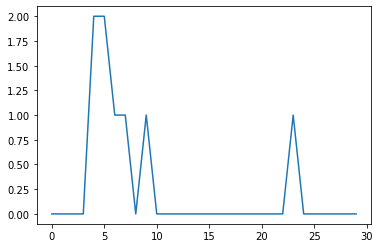

In [0]:
plt.plot(xv1)

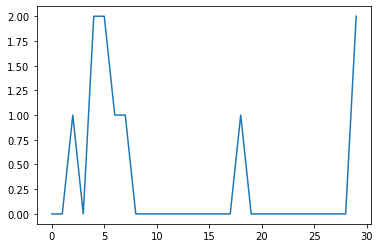

In [0]:
plt.plot(xv2)

In [0]:
# This time, let  Y = 10.

In [0]:
xv5 = gen_x(a0,a1,a2,b0,b1,b2,c0,c1,c2, 10)
xv6 = gen_x(a0,a1,a2,b0,b1,b2,c0,c1,c2, 10)
xv7 = gen_x(a0,a1,a2,b0,b1,b2,c0,c1,c2, 10)
xv8 = gen_x(a0,a1,a2,b0,b1,b2,c0,c1,c2, 10)

In [0]:
print(xv5)
print(xv6)
print(xv7)
print(xv8)

[0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]


In [0]:
# Visualize vector xv5

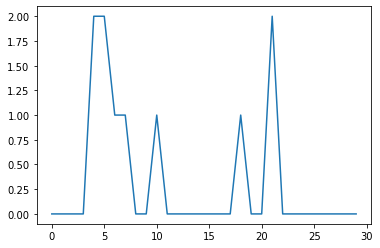

In [0]:
plt.plot(x2)

In [0]:
# The results suggest that there may be a pattern in the permutation of entries 
# in the vectors of X. We often see ones following twos, creating downward steps
# in the plot. 

In [0]:
# Variable Y seems to determine where/when these steps begin. If we set Y as 
# equal to k, we are likely to see the aforementioned pattern starting from 
# the kth entry of the simulated x vector. 

In [0]:
# Part (b)

In [0]:
# Using indicator functions make the expression much easier 

$log P(X_1, X_2, ..., X_d, Y)$

$ = log(P(X_1, ..., X_d | Y = k)P(Y = k)) $  

(We use Bayes' rule)

$= log(P(X_1 | Y = k)  ... P(X_d | Y = k)P(Y = k)) $

$= log(\pi_k \cdot (\prod_{j=1}^{k-1} c_{0}^{X_{j0}} c_{1}^{X_{j1}} c_{2}^{X_{j2}}) \cdot a_{0}^{X_{k0}} a_{1}^{X_{k1}} a_{2}^{X_{k2}} a_{0}^{X_{(k+1)0}} a_{1}^{X_{(k+1)1}} a_{2}^{X_{(k+1)2}} b_{0}^{X_{(k+2)0}} b_{1}^{X_{(k+2)1}} b_{2}^{X_{(k+2)2}} b_{0}^{X_{(k+3)0}} b_{1}^{X_{(k+3)1}} b_{2}^{X_{(k+3)2}} \cdot (\prod_{j=k+4}^{d} c_{0}^{X_{j0}} c_{1}^{X_{j1}} c_{2}^{X_{j2}}) )$

In [0]:
# Part (c)

In [0]:
# If we had a fully observed sample X_i, Y_i (i = 1,...,n), we can simply use the
# expression of the log-joint distribution above to calculate the maximum 
# likelihood estimates. We differentiate the sum of log P(X_1, ..., X_d, Y) given X  
# w.r.t. a parameter, set it equal to zero, and solve the score equation. 

To illustrate, in order to estimate $a_0$, we calculate the following

$0 = \frac{d}{d a_0} \Sigma_{i=1}^{d} log P(X_1, ..., X_d, Y)$

$\rightarrow \Sigma_{i=1}^{d} 2 a_0 - (X_{ik0} + X_{i(k+1)0}) = 0$

$\rightarrow a_0 = \frac{\Sigma_{i=1}^{d} X_{ik0} + X_{i(k+1)0}}{2d}$

In [0]:
# To summarize, to find the maximum likelihood estimate of a_0, 
# we are counting zeros in the kth and k+1th entries in all X 
# vectors. We then divide that by twice the total number of vectors.
# We can propogate this intuition to explain the solution for solving
# for maximum likelihood estimates of a_i, b_i, c_i, and pi_i. 

# a_i = count how many i's appear in the k and k+1th 
# entries of all X vectors and divide by twice the total number of vectors.

# b_i = count how many i's appear in the k+2 and k+3rd 
# entries of all X vectors and divide by twice the total number of vectors.

# c_i = count how many i's appear in the rest of the entries of all X
# vectors and divide by d * (d-4).

# pi_i = count the number of Y = i's divided by total number of vectors.

In [0]:
# Part (d)

In [0]:
# pseudo code for the EM iterations that estimate the parameters if 
# Y_i are unobserved.

Initializing parameters

E Step : 

a. Compute log-probabilities 

$log(w_{i}(z))$
$ = log(\frac{P(X_1, ..., X_d, Y)}{\Sigma_Y P(X_1, ..., X_d, Y)})$
$ = log(P(X_1, ..., X_d, Y)) - log(\Sigma_Y P(X_1, ..., X_d, Y))$

b. Using the log-joint distribution in part(b) we calculate

$log(P(X_1, ..., X_d, Y)) = log(\pi_k \cdot (\prod_{j=1}^{k-1} c_{0}^{X_{j0}} c_{1}^{X_{j1}} c_{2}^{X_{j2}}) \cdot a_{0}^{X_{k0}} a_{1}^{X_{k1}} a_{2}^{X_{k2}} a_{0}^{X_{(k+1)0}} a_{1}^{X_{(k+1)1}} a_{2}^{X_{(k+1)2}} b_{0}^{X_{(k+2)0}} b_{1}^{X_{(k+2)1}} b_{2}^{X_{(k+2)2}} b_{0}^{X_{(k+3)0}} b_{1}^{X_{(k+3)1}} b_{2}^{X_{(k+3)2}} \cdot (\prod_{j=k+4}^{d} c_{0}^{X_{j0}} c_{1}^{X_{j1}} c_{2}^{X_{j2}}) )$

c. Using scipy.misc.logsumexp function, compute 

$log(\Sigma_Y P(X_1, ..., X_d, Y))$.

d. Compute $w_i(z)$ by calculating 

$exp(log(P(X_1, ..., X_d, Y)) - log(\Sigma_Y P(X_1, ..., X_d, Y)))$


M Step : 

a. Maximize 

$\theta(t+1) = argmax \Sigma_{i} \Sigma_{Y} w_{i}(z) log(P(X_i, Y | \theta))$

which solves 

$\Sigma_{i} \Sigma_{Y} w_{i}(z) d_{\theta} log(P(X_i, Y | \theta)) = 0$.

b. Replace the derivative with the maximum likelihood estimator. Then,

$\theta(t+1)$ solves $\Sigma_{i} \Sigma_{Y} w_{i}(z) MLE(\theta) = 0$.

c. Compute the expected values of MLE (Since $Y_i$ are unobserved)

Add the products of $P(Y_i = k)$ and the MLE expression given $Y_i = k$. Then we retrieve $\theta(t+1)$.

3: Repeat the E and M steps until $\frac{|\theta(t+1) - \theta(t)|}{|\theta(t)|} < \epsilon$. 
